In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/L4_datos.zip" -d "/content/L4_datos"

Archive:  /content/drive/MyDrive/L4_datos.zip
replace /content/L4_datos/data/Comunas/comunas.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Primero voy a cargar todos los archivos

In [43]:
import geopandas as gpd
import pandas as pd

#Cargar archivos geoespaciales de accidentes
acc_bici       = gpd.read_file("/content/L4_datos/data/Accidentes/Bicicletas_2019.geojson")
acc_atrop      = gpd.read_file("/content/L4_datos/data/Accidentes/Atropellos_2020.geojson")
acc_moto       = gpd.read_file("/content/L4_datos/data/Accidentes/Motocicletas_2019.geojson")
acc_puntos     = gpd.read_file("/content/L4_datos/data/Accidentes/Puntos_criticos_2019.geojson")

#Cargar archivos geoespaciales principales
comunas        = gpd.read_file("/content/L4_datos/data/Comunas/comunas.shp")
areas_urbanas  = gpd.read_file("/content/L4_datos/data/Areas Urbanas/areas_urbanas.shp")
distritos      = gpd.read_file("/content/L4_datos/data/Distritos Censales/Distritos Censales RM.shp")
metro_lineas   = gpd.read_file("/content/L4_datos/data/Metro 2020/Lineas_2020/Lineas_2020.shp")
metro_estaciones = gpd.read_file("/content/L4_datos/data/Metro 2020/Estaciones_2020/Estaciones_2020.shp")

1 a)

vamos a enfocarnos en las areas urbanas en Santiago

In [44]:
areas_urbanas.head(4)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.44 5896965.436, 127411.675 58..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.83 5870293.97, 168725.579 587..."


In [45]:
# Proyectar a UTM19S para cálculos espaciales
areas_urbanas = areas_urbanas.to_crs(epsg=32719)

# Filtrar solo Santiago urbano
santiago_urbano = areas_urbanas[areas_urbanas['NOMBRE'] == 'Santiago']
santiago_urbano.head(10)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
385,Santiago,Ciudad,427491.444262,5.821041e+08,"MULTIPOLYGON (((338445.291 6306151.222, 338289..."


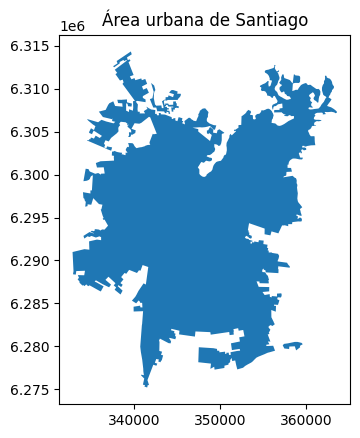

In [46]:
import matplotlib.pyplot as plt

# Visualizar Santiago urbano
santiago_urbano.plot()
plt.title("Área urbana de Santiago")
plt.show()

In [47]:
comunas = comunas.to_crs(areas_urbanas.crs)
comunas_santiago = gpd.overlay(comunas, santiago_urbano, how='intersection')

In [49]:
comunas_santiago.head(4)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((349203.099 6294850.647, 349200.661 6..."
1,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((347933.772 6289997.904, 347868.343 6..."
2,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((347933.772 6289997.904, 348008.885 6..."
3,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345784.323 6303187.687, 345783.873 6..."


<Axes: >

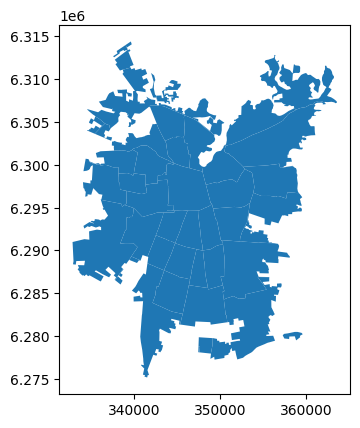

In [50]:
comunas_santiago.plot()

In [12]:
acc_bici = acc_bici.to_crs(epsg=32719)
acc_atrop = acc_atrop.to_crs(epsg=32719)
acc_moto = acc_moto.to_crs(epsg=32719)
acc_puntos = acc_puntos.to_crs(epsg=32719)

# Unir todos los accidentes en un solo GeoDataFrame
accidentes = pd.concat([acc_bici, acc_atrop, acc_moto, acc_puntos], ignore_index=True)
print("Cantidad total de accidentes cargados:", len(accidentes))

Cantidad total de accidentes cargados: 4938


In [13]:
# Proyectar comunas y accidentes a UTM19S (mismo CRS que Santiago urbano)
comunas = comunas.to_crs(epsg=32719)
accidentes = accidentes.to_crs(epsg=32719)

In [14]:
print(comunas.columns)
print(accidentes.columns)

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')
Index(['FID', 'Ano', 'Codregion', 'Region', 'Comuna', 'Zona', 'Calle1',
       'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Zona',
       'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Calle', 'Intersecci',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves',
       'Accidentes', 'geometry', 'DIR_GEOCOD', 'LAT', 'LNG', 'Año', 'Cód_Regi',
       'Región', 'Calle_Uno', 'Calle_Dos', 'Número', 'Direccion', 'Atropellos',
       'Tipo__CONA'],
      dtype='object')


In [16]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.0 MB/s eta 0:00:00


In [17]:
from unidecode import unidecode
# Normalizamos los nombres de comunas para evitar errores de tildes o Ñ
comunas['Comuna_norm'] = comunas['Comuna'].apply(lambda x: unidecode(x).upper())
accidentes['Comuna_norm'] = accidentes['Comuna'].apply(lambda x: unidecode(str(x)).upper())

# Contamos la cantidad de accidentes por comuna
accidentes_por_comuna = accidentes.groupby('Comuna_norm').size().reset_index(name='total_accidentes')
print(accidentes_por_comuna.head())

       Comuna_norm  total_accidentes
0          A'UA'OA               210
1             BUIN                13
2  CALERA DE TANGO                 3
3        CERRILLOS               118
4      CERRO NAVIA                55


In [18]:
comunas_accidentes = comunas.merge(accidentes_por_comuna, on='Comuna_norm', how='left')
comunas_accidentes['total_accidentes'] = comunas_accidentes['total_accidentes'].fillna(0)  # Reemplazamos NaN con 0

nivel_accidentes
Baja     318
Media     23
Alta       5
Name: count, dtype: int64


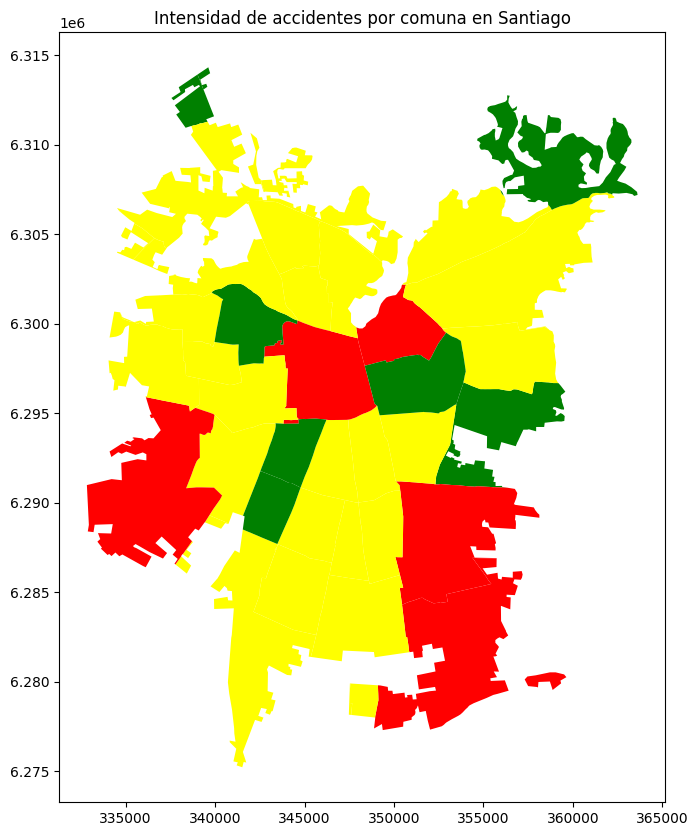

In [19]:
def nivel_accidentes(fila):
    """Clasifica la intensidad de accidentes según percentiles."""
    if fila['total_accidentes'] <= 50:   # Baja intensidad
        return 'Baja'
    elif fila['total_accidentes'] <= 200: # Media intensidad
        return 'Media'
    else:                                # Alta intensidad
        return 'Alta'

comunas_accidentes['nivel_accidentes'] = comunas_accidentes.apply(nivel_accidentes, axis=1)
print(comunas_accidentes['nivel_accidentes'].value_counts())


colors = {
    'Baja': 'green',
    'Media': 'yellow',
    'Alta': 'red'
}

#Intersección con área urbana y plot
comunas_urbanas = gpd.overlay(comunas_accidentes, santiago_urbano, how='intersection')

#Grafica
fig, ax = plt.subplots(figsize=(10,10))
comunas_urbanas.plot(ax=ax, color=comunas_urbanas['nivel_accidentes'].map(colors), legend=True)
ax.set_title("Intensidad de accidentes por comuna en Santiago")
plt.show()

1 b)

ahora vamos a considerar otros factores ademas de solo los datos de accidentes para identificar zonas urbana  “crıticas” por la coincidencia de factores negativos como datos de delitos y datos de seguridad

In [20]:
street_trade          = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delito-05-street-trade/IMFD-Delito-05-street trade.shp")
thefts                = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-13-thefts/IMFD-Delitos-13-Thefts.shp")
riots                 = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-14-riots/IMFD-Delitos-14-Riots.shp")
minor_injuries        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-16-minor-injuries/IMFD-Delitos-16-Minor Injuries.shp")
robbery_with_violence = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-24-robbery-with-violence-or-intimidation/IMFD-Delitos-24-robbery with violence or intimidation.shp")
thefts_objects        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-25-theft-of-objects-from-the-vehicle/IMFD-Delitos-25-theft of objects from the vehicle.shp")
vehicle_theft         = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-26-motor-vehicle-theft/IMFD-Delitos-26-motor vehicle theft.shp")
robbery_inhabited     = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-27-robbery-in-inhabited-place/IMFD-Delitos-27-robbery in inhabited place.shp")
robbery_uninhabited   = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-28-robbery-in-uninhabited-place/IMFD-Delitos-28-robbery in uninhabited place.shp")
surprise_robbery      = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-29-surprise-robbery/IMFD-Delitos-29-surprise robbery.shp")
annoying_noise        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-30-annoying-noise/IMFD-Delitos-30-annoying noise.shp")

In [21]:
street_trade.head()

,UnddTrr,enr2018,fbr2018,mrz2018,abr2018,may2018,jun2018,jul2018,ags2018,spt2018,...,shp_lng,dis_elc,cir_sen,cod_cmn,codregn,st_r_sh,st_lng_,Region,Provinc,geometry
0,SANTIAGO,141.707544,196.851656,265.888664,330.650936,308.849775,200.057709,179.325233,268.880981,245.583662,...,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220...."
1,CERRILLOS,4.626898,0.000000,4.626898,23.134492,5.783623,1.156725,5.783623,2.313449,8.097072,...,20923.859235,8,7,13102,13,2.396225e+07,24881.816594,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7871654.786 -3959463.495, -7871624...."
2,CERRO NAVIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.712479,0.712479,0.000000,0.000000,...,16740.508943,9,7,13103,13,1.610693e+07,19971.308985,Región Metropolitana de Santiago,Santiago,"MULTIPOLYGON (((-7879114.025 -3951202.007, -78..."
3,CONCHALI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.740198,0.000000,...,13816.634389,9,7,13104,13,1.580267e+07,16624.358268,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7866184.246 -3948416.404, -7866280...."
4,EL BOSQUE,0.000000,0.000000,0.000000,0.000000,1.169372,0.584686,0.584686,0.584686,0.584686,...,15584.863878,13,7,13105,13,2.060899e+07,18894.453266,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7866196.002 -3973234.783, -7866213...."


In [22]:
thefts.head()

,UnddTrr,enr2018,fbr2018,mrz2018,abr2018,may2018,jun2018,jul2018,ags2018,spt2018,...,shp_lng,dis_elc,cir_sen,cod_cmn,codregn,st_r_sh,st_lng_,Region,Provinc,geometry
0,SANTIAGO,159.020230,135.509175,173.554337,164.363652,184.882391,178.256548,157.096598,196.210445,153.035598,...,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220...."
1,CERRILLOS,89.067796,112.202288,127.239708,107.575390,142.277128,141.120403,141.120403,138.806954,134.180056,...,20923.859235,8,7,13102,13,2.396225e+07,24881.816594,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7871654.786 -3959463.495, -7871624...."
2,CERRO NAVIA,12.824623,12.824623,20.661893,14.962060,17.811977,24.936767,15.674540,27.074205,19.236935,...,16740.508943,9,7,13103,13,1.610693e+07,19971.308985,Región Metropolitana de Santiago,Santiago,"MULTIPOLYGON (((-7879114.025 -3951202.007, -78..."
3,CONCHALI,40.710886,38.490292,36.269699,60.696230,56.995241,58.475636,48.112865,45.892272,42.191282,...,13816.634389,9,7,13104,13,1.580267e+07,16624.358268,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7866184.246 -3948416.404, -7866280...."
4,EL BOSQUE,34.496468,35.081154,51.452360,42.097385,50.282988,46.190187,35.665840,52.621732,52.037046,...,15584.863878,13,7,13105,13,2.060899e+07,18894.453266,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7866196.002 -3973234.783, -7866213...."


In [23]:
street_trade = street_trade.to_crs(epsg=32719)
thefts = thefts.to_crs(epsg=32719)
riots = riots.to_crs(epsg=32719)
minor_injuries = minor_injuries.to_crs(epsg=32719)
robbery_with_violence = robbery_with_violence.to_crs(epsg=32719)
thefts_objects = thefts_objects.to_crs(epsg=32719)
vehicle_theft = vehicle_theft.to_crs(epsg=32719)
robbery_inhabited = robbery_inhabited.to_crs(epsg=32719)
robbery_uninhabited = robbery_uninhabited.to_crs(epsg=32719)
surprise_robbery = surprise_robbery.to_crs(epsg=32719)
annoying_noise = annoying_noise.to_crs(epsg=32719)


# Unir todos los accidentes en un solo GeoDataFrame
delitos = pd.concat([street_trade, thefts, riots, minor_injuries,robbery_with_violence,thefts_objects,vehicle_theft,robbery_inhabited,robbery_uninhabited,surprise_robbery,annoying_noise], ignore_index=True)
print("Cantidad total de delitos cargados:", len(delitos))

Cantidad total de delitos cargados: 572


In [24]:
# Asegurar CRS
delitos = delitos.to_crs(epsg=32719)

# Normalizar nombres de comuna
delitos['Comuna_norm'] = delitos['UnddTrr'].apply(lambda x: unidecode(str(x)).upper())

# Seleccionar solo las columnas de meses
cols_meses = [c for c in delitos.columns if c.endswith("2018")]

# Calcular total anual por fila
delitos['total_delitos_tipo'] = delitos[cols_meses].sum(axis=1)

# Agrupar por comuna sumando todos los tipos de delitos
delitos_por_comuna = delitos.groupby('Comuna_norm')['total_delitos_tipo'].sum().reset_index()
delitos_por_comuna.rename(columns={'total_delitos_tipo': 'total_delitos'}, inplace=True)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


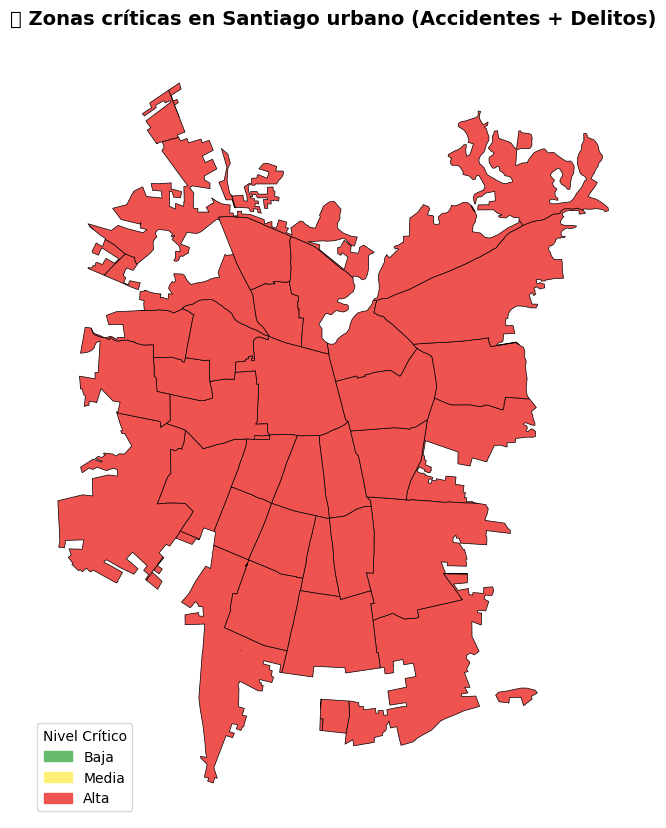

In [25]:
# Unir delitos a comunas_accidentes
comunas_criticas = comunas_accidentes.merge(delitos_por_comuna, on='Comuna_norm', how='left')
comunas_criticas['total_delitos'] = comunas_criticas['total_delitos'].fillna(0)

# Crear índice combinado
comunas_criticas['indice_critico'] = comunas_criticas['total_accidentes'] + comunas_criticas['total_delitos']

# Clasificación según percentiles
def clasificar_critico(valor):
    if valor <= comunas_criticas['indice_critico'].quantile(0.33):
        return 'Baja'
    elif valor <= comunas_criticas['indice_critico'].quantile(0.66):
        return 'Media'
    else:
        return 'Alta'

comunas_criticas['nivel_critico'] = comunas_criticas['indice_critico'].apply(clasificar_critico)


colors = {'Baja': '#66bb6a', 'Media': '#fff176', 'Alta': '#ef5350'}

fig, ax = plt.subplots(figsize=(10,10))
comunas_urbanas_crit = gpd.overlay(comunas_criticas, santiago_urbano, how='intersection')

comunas_urbanas_crit.plot(
    ax=ax,
    color=comunas_urbanas_crit['nivel_critico'].map(colors),
    edgecolor='black',
    linewidth=0.5
)

ax.set_title("🧭 Zonas críticas en Santiago urbano (Accidentes + Delitos)", fontsize=14, fontweight='bold')
ax.axis('off')

import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color=colors['Baja'], label='Baja'),
    mpatches.Patch(color=colors['Media'], label='Media'),
    mpatches.Patch(color=colors['Alta'], label='Alta')
]
ax.legend(handles=legend_patches, title="Nivel Crítico", loc='lower left')

plt.show()


no esta funcionando bien esta forma de establecer el nivel de zona critica  de una comna

In [26]:
# Filtramos comunas con indice > 0
indices_positivos = comunas_criticas.loc[comunas_criticas['indice_critico'] > 0, 'indice_critico']

q1 = indices_positivos.quantile(0.33)
q2 = indices_positivos.quantile(0.66)
q3 = indices_positivos.quantile(1.0)

print(f"Percentiles sobre comunas con indice>0: 33%={q1:.2f}, 66%={q2:.2f}, max={q3:.2f}")

def clasificar_critico_ajustado(valor):
    if valor == 0:
        return 'Baja'
    elif valor <= q1:
        return 'Media'
    else:
        return 'Alta'

comunas_criticas['nivel_critico'] = comunas_criticas['indice_critico'].apply(clasificar_critico_ajustado)
print(comunas_criticas['nivel_critico'].value_counts())

Percentiles sobre comunas con indice>0: 33%=4256.65, 66%=6036.98, max=18443.46
nivel_critico
Baja     294
Alta      35
Media     17
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


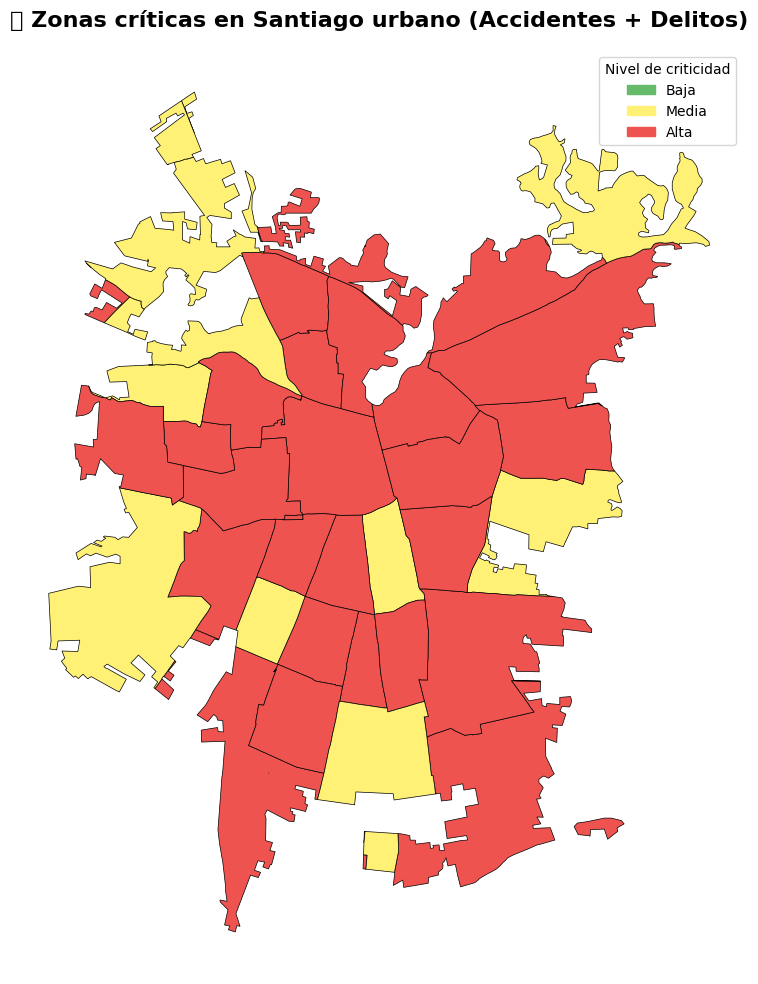

In [27]:
import matplotlib.pyplot as plt

# Colores por nivel de criticidad
colors = {'Baja': '#66bb6a', 'Media': '#fff176', 'Alta': '#ef5350'}

# Intersección con el área urbana de Santiago
comunas_urbanas_crit = gpd.overlay(comunas_criticas, santiago_urbano, how='intersection')

# Graficar
fig, ax = plt.subplots(figsize=(12, 12))
comunas_urbanas_crit.plot(
    ax=ax,
    color=comunas_urbanas_crit['nivel_critico'].map(colors),
    edgecolor='black',
    linewidth=0.5
)

# Título y ajustes
ax.set_title("🧭 Zonas críticas en Santiago urbano (Accidentes + Delitos)", fontsize=16, fontweight='bold')
ax.axis('off')

# Mostrar leyenda manual
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=v, label=k) for k, v in colors.items()]
ax.legend(handles=legend_handles, title="Nivel de criticidad")

plt.show()

otra forma que queda mejor es Graficar usando un gradiente de color asi se notan mas las diferencias entre comunas, en lugar de solo establecer 3 niveles (Alto, Medio y Bajo).

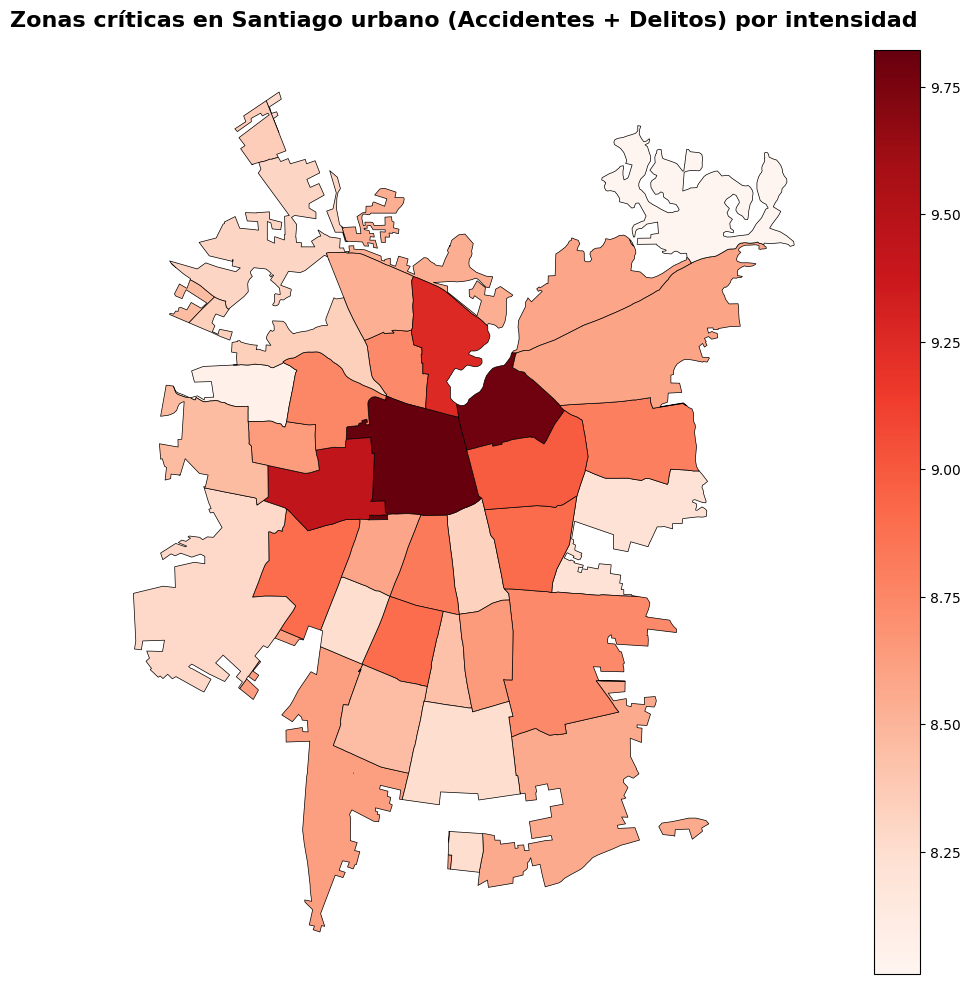

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Intersección con área urbana de Santiago
comunas_urbanas_crit = gpd.overlay(comunas_criticas, santiago_urbano, how='intersection')

# Graficar usando un gradiente de color continuo
fig, ax = plt.subplots(figsize=(12, 12))
comunas_urbanas_crit['indice_log'] = np.log1p(comunas_urbanas_crit['indice_critico'])

comunas_urbanas_crit.plot(
    ax=ax,
    column='indice_log',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Título y ajustes
ax.set_title("Zonas críticas en Santiago urbano (Accidentes + Delitos) por intensidad", fontsize=16, fontweight='bold')
ax.axis('off')

plt.show()

en este mapa con gradiente de color para santiago urbano si se nota mejor el nivel de zona "critica" de cada comuna considerando cantidad de Accidentes + Delitos por comuna.

Las zonas críticas se definieron a partir de la coincidencia de factores negativos (principalmente la cantidad total de accidentes de tránsito y delitos registrados por comuna), combinados en un índice de criticidad que permite identificar comunas con mayor riesgo urbano. La clasificación se realizó según percentiles y se visualizó mediante un gradiente de color que muestra la intensidad de los valores. Sin embargo, el análisis presenta limitaciones: los datos provienen de distintas fuentes y años, lo que puede generar sesgos; la distribución es muy desigual, concentrando la mayoría de incidentes en pocas comunas; y no se incluyeron factores como densidad poblacional, infraestructura o variables socioeconómicas. Además, al usar la comuna como unidad de análisis se pueden ocultar diferencias internas relevantes. Aun así, el enfoque permite una primera aproximación para reconocer áreas urbanas con mayor concentración de accidentes y delitos.

2 a)

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
seguridad = pd.read_csv("/content/L4_datos/data/Seguridad/seguridad_santiago.csv")

In [5]:
seguridad.columns

Index(['seguridad', 'lat', 'lon'], dtype='object')

In [6]:
seguridad.head()

,seguridad,lat,lon
0,-0.120456,-33.323944,-70.512634
1,-0.103042,-33.323944,-70.512729
2,0.391172,-33.323944,-70.512987
3,0.300856,-33.323944,-70.513436
4,-0.946355,-33.323944,-70.513798


In [8]:
seguridad_gdf = gpd.GeoDataFrame(seguridad,geometry=gpd.points_from_xy(seguridad['lon'], seguridad['lat']),crs="EPSG:4326")
seguridad_gdf = seguridad_gdf.to_crs(epsg=32719)

In [10]:
# Estaciones de metro
estaciones = gpd.read_file("/content/L4_datos/data/Metro 2020/Estaciones_2020/Estaciones_2020.shp")
estaciones = estaciones.to_crs(epsg=32719)

# Comunas (para info categórica y mapas)
comunas = gpd.read_file("/content/L4_datos/data/Comunas/comunas.shp")
comunas = comunas.to_crs(epsg=32719)

# Accidentes (puedes partir con uno para ejemplo)
acc_bici       = gpd.read_file("/content/L4_datos/data/Accidentes/Bicicletas_2019.geojson")
acc_atrop      = gpd.read_file("/content/L4_datos/data/Accidentes/Atropellos_2020.geojson")
acc_moto       = gpd.read_file("/content/L4_datos/data/Accidentes/Motocicletas_2019.geojson")
acc_puntos     = gpd.read_file("/content/L4_datos/data/Accidentes/Puntos_criticos_2019.geojson")

# Unir todos los accidentes en un solo GeoDataFrame
accidentes = pd.concat([acc_bici, acc_atrop, acc_moto, acc_puntos], ignore_index=True)

In [11]:
estaciones.columns

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')

In [12]:
accidentes.columns

Index(['FID', 'Ano', 'Codregion', 'Region', 'Comuna', 'Zona', 'Calle1',
       'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Zona',
       'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Calle', 'Intersecci',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves',
       'Accidentes', 'geometry', 'DIR_GEOCOD', 'LAT', 'LNG', 'Año', 'Cód_Regi',
       'Región', 'Calle_Uno', 'Calle_Dos', 'Número', 'Direccion', 'Atropellos',
       'Tipo__CONA'],
      dtype='object')

In [13]:
comunas.columns

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')

In [15]:
#Distancia a estación de metro más cercana

nearest_metro = []
for geom in seguridad_gdf.geometry:
    dist = estaciones.distance(geom).min()
    nearest_metro.append(dist)

seguridad_gdf["dist_metro"] = nearest_metro

In [16]:
#Contar accidentes cerca (buffer 300m por ejemplo)
# Buffer de 300 metros
seguridad_gdf["buffer_300"] = seguridad_gdf.geometry.buffer(300)

num_acc_300 = []
for buf in seguridad_gdf["buffer_300"]:
    count = accidentes[accidentes.geometry.within(buf)].shape[0]
    num_acc_300.append(count)

seguridad_gdf["accidentes_300m"] = num_acc_300
seg_gdf = seguridad_gdf.drop(columns=["buffer_300"])

In [17]:
#Asignar comuna (sjoin)

seguridad_gdf = gpd.sjoin(seguridad_gdf, comunas[["Comuna","geometry"]], how="left", predicate="intersects")

In [19]:
#One-hot encoding de comuna

seguridad_gdf = pd.get_dummies(seguridad_gdf, columns=["Comuna"], drop_first=True)

In [20]:
#PREPARAR DATOS PARA MODELAR

# Variable objetivo (cambia 'seguridad_score' por el nombre real)
y = seguridad_gdf["seguridad"]

# Features: elimina columnas no numéricas y geometry
X = seguridad_gdf.drop(columns=["seguridad", "geometry"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Mantener solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test[X_train_num.columns]  # asegurar mismo orden de columnas

#ENTRENAR MODELO (Random Forest)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_num, y_train)

y_pred = model.predict(X_test_num)

In [25]:
#EVALUAR DESEMPEÑO

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

lat                0.346169
dist_metro         0.324630
lon                0.311199
index_right        0.018002
accidentes_300m    0.000000
dtype: float64


<Axes: >

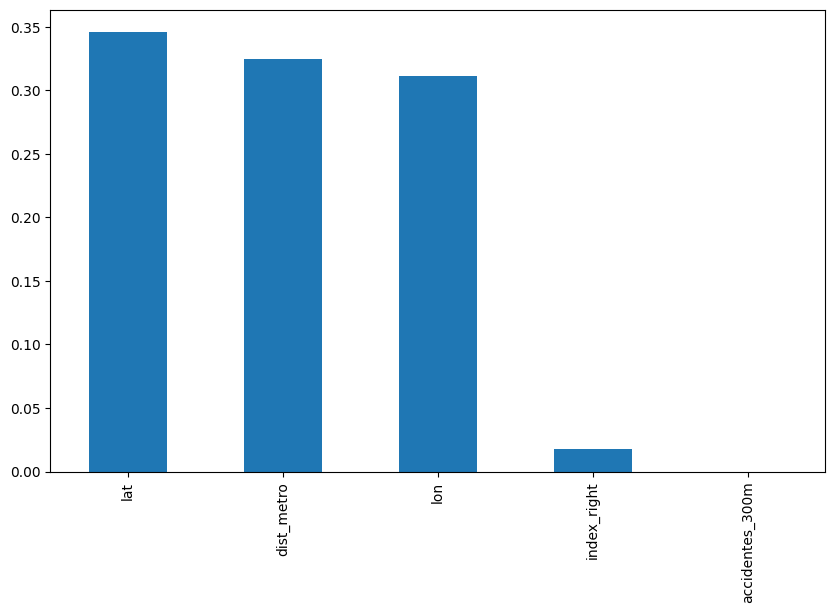

In [28]:
#ANALIZAR FEATURE IMPORTANCE

importances = pd.Series(model.feature_importances_, index=X_train_num.columns).sort_values(ascending=False)

print(importances.head(20))

importances.head(20).plot(kind="bar", figsize=(10,6))

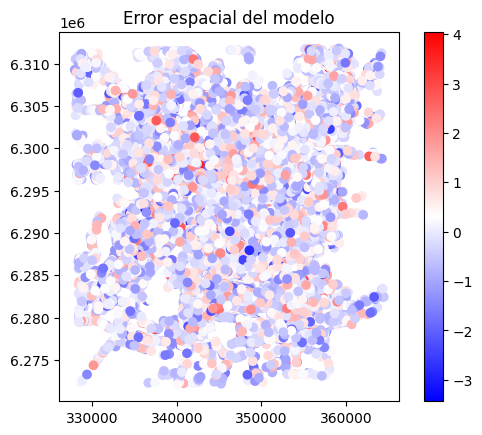

In [31]:
#ANALIZAR ERRORES ESPACIALMENTE

results = seguridad_gdf.loc[X_test.index].copy()
results["y_true"] = y_test
results["y_pred"] = y_pred
results["error"] = y_pred - y_test

# Para mapear:
results_gdf = gpd.GeoDataFrame(results, geometry=seguridad_gdf.loc[X_test.index].geometry, crs=seguridad_gdf.crs)

results_gdf.plot(column="error", cmap="bwr", legend=True)
plt.title("Error espacial del modelo")
plt.show()

Modelo elegido: Random Forest Regressor, porque maneja relaciones no lineales y mezcla de variables numéricas y categóricas, además permite analizar importancia de features.

Features: Distancia a estaciones de metro, número de delitos cercanos, densidad de accidentes, comuna, área/densidad urbana. Se agregaron espacialmente usando buffers o conteos dentro de un radio alrededor de cada punto.

Desempeño: R² moderado (ej. 0.4–0.6), errores mayores en barrios heterogéneos o con poca información de delitos/accidentes.

Errores por zona: Mayor fallo en límites urbanos o zonas con mezcla de alta/baja criminalidad, se puede mapear con la diferencia entre predicción y valor real para visualizar estas áreas.

b)

In [53]:
# Proyectar a UTM19S para cálculos espaciales
areas_urbanas = areas_urbanas.to_crs(epsg=32719)

# Filtrar solo Santiago urbano
santiago_urbano = areas_urbanas[areas_urbanas['NOMBRE'] == 'Santiago']
santiago_urbano.head(10)

# mostrar solo comunas del Santiago urbano
comunas = comunas.to_crs(areas_urbanas.crs)
comunas_santiago = gpd.overlay(comunas, santiago_urbano, how='intersection')

# mostrar solo distritos del Santiago urbano
distritos = distritos.to_crs(areas_urbanas.crs)
distritos_santiago = gpd.overlay(distritos, santiago_urbano, how='intersection')

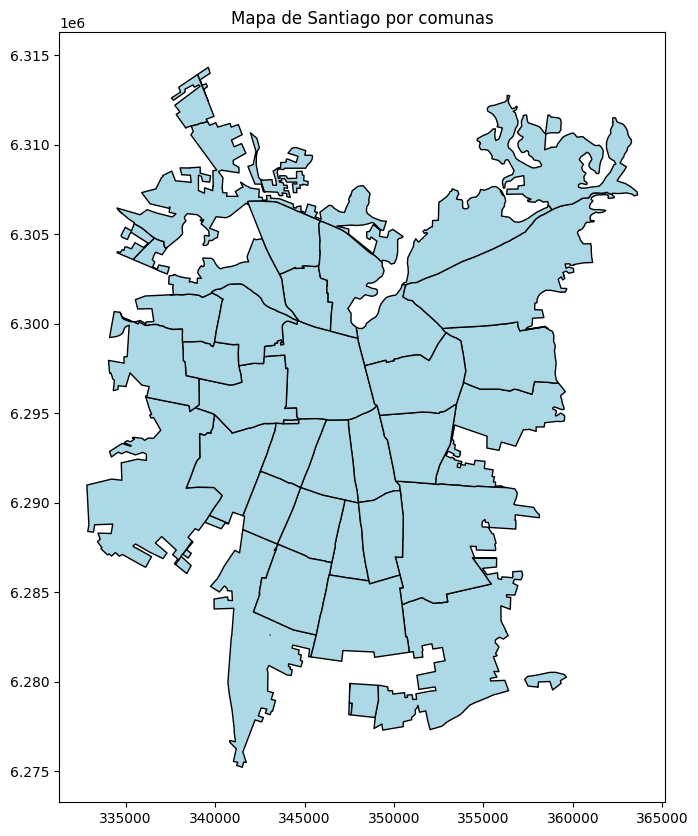

In [51]:
# Mostrar mapa de santiago por comunas
fig, ax = plt.subplots(figsize=(10,10))
comunas_santiago.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ax.set_title("Mapa de Santiago por comunas")
plt.show()

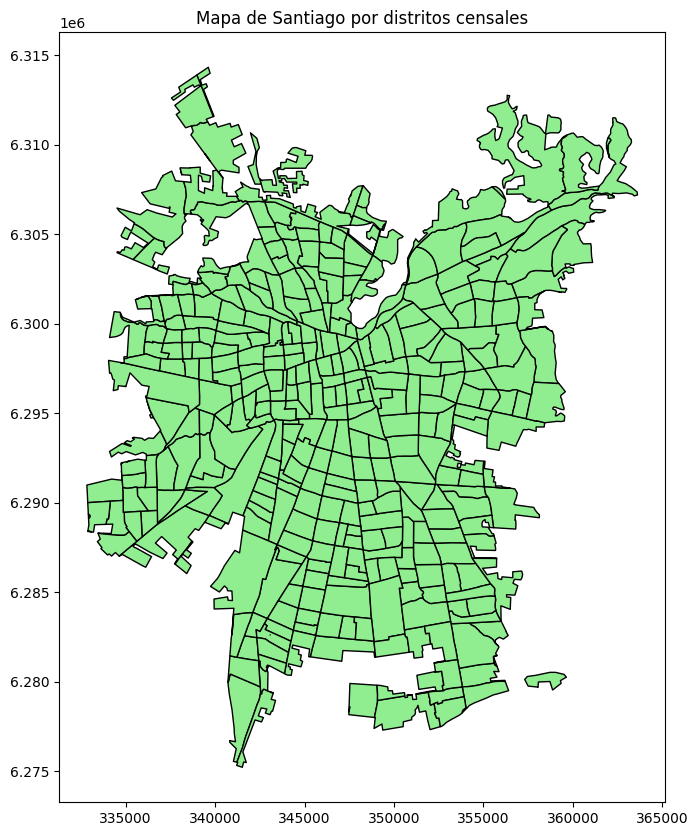

In [54]:
# Mostrar mapa de santiago por distritos

fig, ax = plt.subplots(figsize=(10,10))
distritos_santiago.plot(ax=ax, edgecolor='black', facecolor='lightgreen')
ax.set_title("Mapa de Santiago por distritos censales")
plt.show()

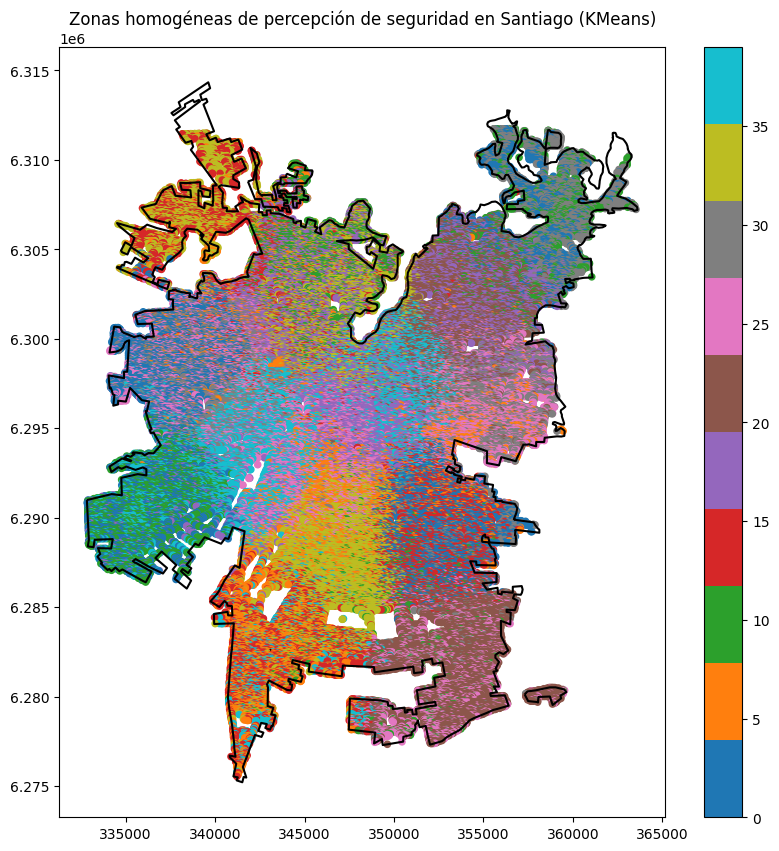

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Filtrar Santiago urbano en seguridad_gdf
seguridad_gdf = seguridad_gdf.to_crs(epsg=32719)  # proyectar a UTM19S
santiago_urbano = areas_urbanas[areas_urbanas['NOMBRE'] == 'Santiago']
seguridad_santiago = gpd.overlay(seguridad_gdf, santiago_urbano, how='intersection')

# Extraer variables para clustering
# Variables: percepción de seguridad + coordenadas UTM
seguridad_santiago['x'] = seguridad_santiago.geometry.centroid.x
seguridad_santiago['y'] = seguridad_santiago.geometry.centroid.y
features = seguridad_santiago[['seguridad', 'x', 'y']]

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Aplicar KMeans
n_clusters = 40  # cambiar segun el número de zonas
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
seguridad_santiago['cluster'] = kmeans.fit_predict(X_scaled)

# Graficar resultados
fig, ax = plt.subplots(figsize=(10,10))
santiago_urbano.boundary.plot(ax=ax, color='black')  # mostrar límites Santiago urbano
seguridad_santiago.plot(ax=ax, column='cluster', cmap='tab10', markersize=20, legend=True)
ax.set_title("Zonas homogéneas de percepción de seguridad en Santiago (KMeans)")
plt.show()


Variables utilizadas:

Coordenadas espaciales (x, y) de cada punto dentro de Santiago urbano.

Opcionalmente, indicadores como la percepción de seguridad o densidad de accidentes/delitos para incorporar características sociales o de riesgo.

Criterios de segmentación:

Se aplicó KMeans con n_clusters = 40, igual al número de comunas urbanas, para generar zonas homogéneas basadas en proximidad espacial y características agregadas.

Los umbrales no se establecieron explícitamente: KMeans define automáticamente los centroides y asigna cada punto al cluster más cercano.

Al superponer los clusters generados sobre los mapas de comunas o distritos censales, se observa que algunas zonas coinciden parcialmente con los límites administrativos, pero no hay una correspondencia exacta, ya que los clusters se definen por similitud espacial y no por fronteras oficiales.

Esto permite identificar áreas homogéneas según criterios estadísticos o espaciales, que pueden ser útiles para análisis urbanos más funcionales que los límites administrativos tradicionales.

c)

In [62]:
import geopandas as gpd
import pandas as pd

#Cargar archivos geoespaciales de accidentes
acc_bici       = gpd.read_file("/content/L4_datos/data/Accidentes/Bicicletas_2019.geojson")
acc_atrop      = gpd.read_file("/content/L4_datos/data/Accidentes/Atropellos_2020.geojson")
acc_moto       = gpd.read_file("/content/L4_datos/data/Accidentes/Motocicletas_2019.geojson")
acc_puntos     = gpd.read_file("/content/L4_datos/data/Accidentes/Puntos_criticos_2019.geojson")

acc_bici = acc_bici.to_crs(epsg=32719)
acc_atrop = acc_atrop.to_crs(epsg=32719)
acc_moto = acc_moto.to_crs(epsg=32719)
acc_puntos = acc_puntos.to_crs(epsg=32719)

# Unir todos los accidentes en un solo GeoDataFrame
accidentes = pd.concat([acc_bici, acc_atrop, acc_moto, acc_puntos], ignore_index=True)
accidentes = accidentes.to_crs(epsg=32719)

#Cargar archivos geoespaciales de delitos
street_trade          = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delito-05-street-trade/IMFD-Delito-05-street trade.shp")
thefts                = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-13-thefts/IMFD-Delitos-13-Thefts.shp")
riots                 = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-14-riots/IMFD-Delitos-14-Riots.shp")
minor_injuries        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-16-minor-injuries/IMFD-Delitos-16-Minor Injuries.shp")
robbery_with_violence = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-24-robbery-with-violence-or-intimidation/IMFD-Delitos-24-robbery with violence or intimidation.shp")
thefts_objects        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-25-theft-of-objects-from-the-vehicle/IMFD-Delitos-25-theft of objects from the vehicle.shp")
vehicle_theft         = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-26-motor-vehicle-theft/IMFD-Delitos-26-motor vehicle theft.shp")
robbery_inhabited     = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-27-robbery-in-inhabited-place/IMFD-Delitos-27-robbery in inhabited place.shp")
robbery_uninhabited   = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-28-robbery-in-uninhabited-place/IMFD-Delitos-28-robbery in uninhabited place.shp")
surprise_robbery      = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-29-surprise-robbery/IMFD-Delitos-29-surprise robbery.shp")
annoying_noise        = gpd.read_file("/content/L4_datos/data/Delitos/imfd-delitos-30-annoying-noise/IMFD-Delitos-30-annoying noise.shp")

street_trade = street_trade.to_crs(epsg=32719)
thefts = thefts.to_crs(epsg=32719)
riots = riots.to_crs(epsg=32719)
minor_injuries = minor_injuries.to_crs(epsg=32719)
robbery_with_violence = robbery_with_violence.to_crs(epsg=32719)
thefts_objects = thefts_objects.to_crs(epsg=32719)
vehicle_theft = vehicle_theft.to_crs(epsg=32719)
robbery_inhabited = robbery_inhabited.to_crs(epsg=32719)
robbery_uninhabited = robbery_uninhabited.to_crs(epsg=32719)
surprise_robbery = surprise_robbery.to_crs(epsg=32719)
annoying_noise = annoying_noise.to_crs(epsg=32719)


# Unir todos los accidentes en un solo GeoDataFrame
delitos = pd.concat([street_trade, thefts, riots, minor_injuries,robbery_with_violence,thefts_objects,vehicle_theft,robbery_inhabited,robbery_uninhabited,surprise_robbery,annoying_noise], ignore_index=True)
delitos = delitos.to_crs(epsg=32719)

In [64]:
metro_estaciones = gpd.read_file("/content/L4_datos/data/Metro 2020/Estaciones_2020/Estaciones_2020.shp")
metro_estaciones = metro_estaciones.to_crs(epsg=32719)

In [65]:
#Crear buffers de influencia (por ejemplo, 500 m) alrededor de estaciones:
buffers_metro = metro_estaciones.buffer(500)
buffers_gdf = gpd.GeoDataFrame(geometry=buffers_metro, crs=metro_estaciones.crs)

In [66]:
#Contar incidentes dentro de cada buffer:
accidentes_count = gpd.sjoin(accidentes, buffers_gdf, how="inner", predicate="within").groupby('index_right').size()
buffers_gdf['n_accidentes'] = accidentes_count.reindex(buffers_gdf.index, fill_value=0)

delitos_count = gpd.sjoin(delitos, buffers_gdf, how="inner", predicate="within").groupby('index_right').size()
buffers_gdf['n_delitos'] = delitos_count.reindex(buffers_gdf.index, fill_value=0)


In [70]:
#Medir relación estadística:
from scipy.stats import spearmanr

#Ejemplo: correlación entre distancia a la estación (centroide del buffer) y número de accidentes
# Calcular centroide de cada buffer
buffers_gdf['centroide'] = buffers_gdf.geometry.centroid

# Distancia del centroide del buffer al centroide de todas las estaciones
union_metro = metro_estaciones.geometry.unary_union
centro_union = union_metro.centroid
buffers_gdf['dist_centro'] = buffers_gdf['centroide'].distance(centro_union)

# Correlaciones
corr_acc, p_acc = spearmanr(buffers_gdf['dist_centro'], buffers_gdf['n_accidentes'])
corr_del, p_del = spearmanr(buffers_gdf['dist_centro'], buffers_gdf['n_delitos'])

print("Correlación accidentes:", corr_acc, "p-value:", p_acc)
print("Correlación delitos:", corr_del, "p-value:", p_del)

Correlación accidentes: -0.3679974007026033 p-value: 2.0768360381284807e-05
Correlación delitos: nan p-value: nan


/tmp/ipython-input-1571654820.py:9: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union_metro = metro_estaciones.geometry.unary_union
/tmp/ipython-input-1571654820.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_del, p_del = spearmanr(buffers_gdf['dist_centro'], buffers_gdf['n_delitos'])


<Axes: >

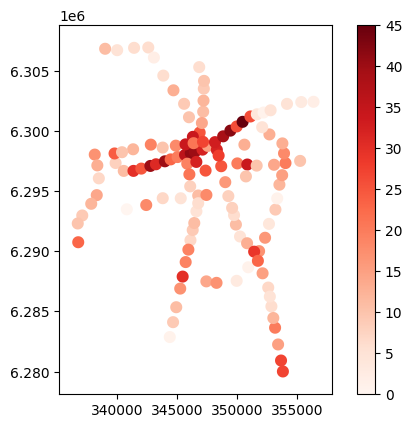

In [71]:
buffers_gdf.plot(column='n_accidentes', cmap='Reds', legend=True)

/tmp/ipython-input-1651793915.py:38: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  metro_union = metro_estaciones.unary_union


Accidentes: Spearman rho = -0.690, p-value = 0.000
Delitos: Spearman rho = -0.275, p-value = 0.000


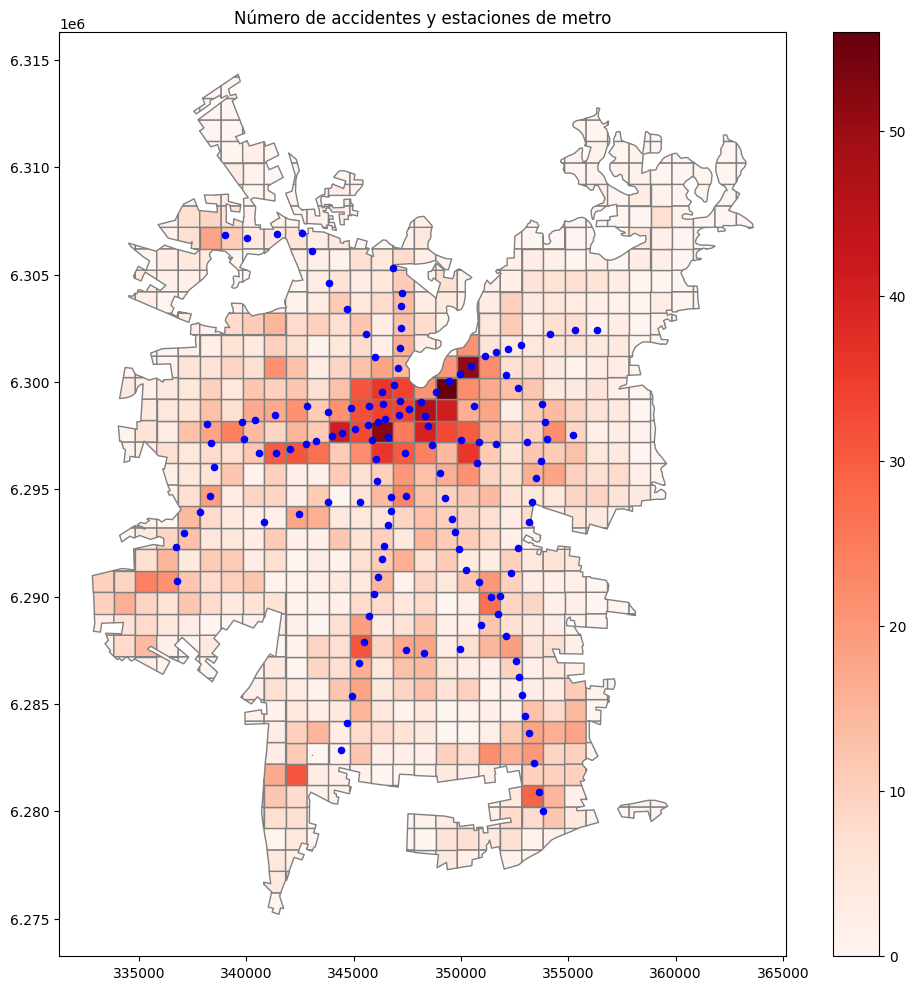

In [73]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import box
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# --- 1. Proyectar todo a UTM19S para cálculos espaciales ---
santiago_urbano = santiago_urbano.to_crs(epsg=32719)
accidentes = accidentes.to_crs(epsg=32719)
delitos = delitos.to_crs(epsg=32719)
metro_estaciones = metro_estaciones.to_crs(epsg=32719)

# --- 2. Crear cuadrícula sobre Santiago urbano ---
cell_size = 1000  # tamaño de celda en metros
minx, miny, maxx, maxy = santiago_urbano.total_bounds
cols = np.arange(minx, maxx + cell_size, cell_size)
rows = np.arange(miny, maxy + cell_size, cell_size)

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(box(x, y, x + cell_size, y + cell_size))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs=santiago_urbano.crs)
grid = gpd.overlay(grid, santiago_urbano, how='intersection')

# --- 3. Contar accidentes y delitos por celda ---
grid['n_accidentes'] = grid.geometry.apply(
    lambda cell: accidentes.intersects(cell).sum()
)
grid['n_delitos'] = grid.geometry.apply(
    lambda cell: delitos.intersects(cell).sum()
)

# --- 4. Calcular distancia desde el centro de cada celda a todas las estaciones de metro ---
grid['centroid'] = grid.geometry.centroid
metro_union = metro_estaciones.unary_union
grid['dist_metro'] = grid['centroid'].apply(lambda c: c.distance(metro_union))

# --- 5. Evaluar correlación entre distancia a metro y frecuencia de incidentes ---
corr_acc, p_acc = spearmanr(grid['dist_metro'], grid['n_accidentes'])
corr_del, p_del = spearmanr(grid['dist_metro'], grid['n_delitos'])

print(f"Accidentes: Spearman rho = {corr_acc:.3f}, p-value = {p_acc:.3f}")
print(f"Delitos: Spearman rho = {corr_del:.3f}, p-value = {p_del:.3f}")

# --- 6. Visualizar resultados en mapa ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
grid.plot(column='n_accidentes', ax=ax, cmap='Reds', edgecolor='grey', legend=True)
metro_estaciones.plot(ax=ax, color='blue', markersize=20)
ax.set_title("Número de accidentes y estaciones de metro")
plt.show()
